# Hypothesis Testing with grades
This notebook will walk through the steps of analyzing students grades to determine if not studying has a negative impact on a student's grade.

## Import Dependencies

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math
import pandas as pd

## Generate stats for grades population

In [4]:
gradesDF = pd.read_csv("Grades_Data.csv")
gradesDF.head()

,Grades
0,75.14
1,87.68
2,65.46
3,69.22
4,68.72


In [5]:
gradesDF['Grades'].describe()

count    1100.000000
mean       79.736309
std         5.897389
min        59.410000
25%        76.052500
50%        79.965000
75%        83.762500
max        99.610000
Name: Grades, dtype: float64

In [6]:
grades = list(gradesDF.round()['Grades'])
grades[:5]

[75.0, 88.0, 65.0, 69.0, 69.0]

In [7]:
mu = np.average(grades)
variance = np.var(grades)
sigma = math.sqrt(variance)
print(f"Average: {mu}\nVariance: {variance}\nStandard Deviation: {sigma}")

Average: 79.71090909090908
Variance: 35.11824462809918
Standard Deviation: 5.926064851830359


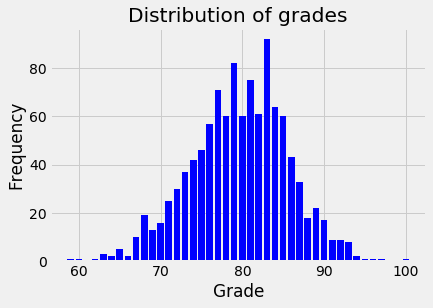

In [8]:
plt.style.use('fivethirtyeight')

x_axis = list(set(grades))
y_axis = [grades.count(grade) for grade in x_axis]

plt.bar(x_axis, y_axis, color="b", label="Real Distribution")
plt.title("Distribution of grades")
plt.xlabel("Grade")
plt.ylabel("Frequency")
plt.show()

## Generate stats for sample who did not study

In [9]:
grades_DNS_DF = pd.read_csv("Grades_Data_Did_Not_Study.csv")
grades_DNS_DF.head()

,Grades
0,71.70
1,57.61
2,60.17
3,69.27
4,75.36


In [10]:
grades_DNS_DF['Grades'].describe()

count    100.00000
mean      68.26270
std        5.47611
min       56.51000
25%       63.95000
50%       68.13000
75%       72.99000
max       79.10000
Name: Grades, dtype: float64

In [11]:
grades_DNS = list(grades_DNS_DF.round()['Grades'])
grades_DNS[:5]

[72.0, 58.0, 60.0, 69.0, 75.0]

In [12]:
mu = grades_DNS_DF['Grades'].describe()[1]
variance = np.var(grades_DNS)
sigma = grades_DNS_DF['Grades'].describe()[2]
print(f"Average: {mu}\nVariance: {variance}\nStandard Deviation: {sigma}")

Average: 68.26270000000001
Variance: 29.417100000000005
Standard Deviation: 5.476110072419337


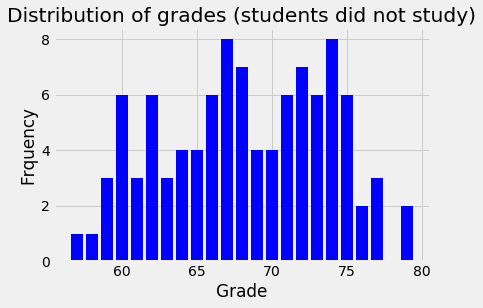

In [13]:
plt.clf
plt.style.use('fivethirtyeight')

x_axis = list(set(grades_DNS))
y_axis = [grades_DNS.count(grade) for grade in x_axis]

plt.bar(x_axis, y_axis, color="b", label="Real Distribution")
plt.title("Distribution of grades (students did not study)")
plt.xlabel("Grade")
plt.ylabel("Frquency")
plt.show()

## Define Hypotheses and statistical significance to look for

### H<sub>0</sub>: Mu<sub>dns</sub> = Mu<sub>pop</sub>
### H<sub>A</sub>: Mu<sub>dns</sub> < Mu<sub>pop</sub>

## Define function for Calculating p-value

In [14]:
def p_value(sample_mean, population_array, tails=2):
    # We already know this
    mu = np.average(population_array)
    variance = np.var(population_array)
    sigma = math.sqrt(variance)
    
    z_score = (sample_mean - mu) / sigma
    
    psr = [mu - (abs(z_score) * sigma), mu + (abs(z_score) * sigma)]
    
    pop_score = 0
    
    for item in population_array:
        if item > psr[0] and item < psr[1]:
            pop_score += 1
    pop_percent = pop_score/len(population_array)
    
    pvalue = 1 - pop_percent
    
    if tails == 1:
        pvalue = pvalue / 2
    return {"p-value": pvalue, "z-score": z_score}

In [15]:
p_value(68, grades)

{'p-value': 0.06090909090909091, 'z-score': -1.9761695802724777}

In [16]:
p_value(68, grades, 1)

{'p-value': 0.030454545454545456, 'z-score': -1.9761695802724777}

### Null hypothesis assumes that isolating any particualr variable to test for an effect on out data will not yield any results different from the data for the control group.